#  Tarea 1<br/>Regresión Lineal
#### Miguel Videla A.<br/>MA5204 Aprendizaje de Máquinas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### P1. Máxima Verosimilitud

In [2]:
# Normal distirbution and likelihood
def normal_distribution(y, mean, variance):
    A = 1 / (np.sqrt(2 * np.pi * variance))
    B = np.exp(np.multiply(-1 / (2 * variance), (y - mean) ** 2))
    return np.multiply(A, B)

def likelihood(y, mean, variance):
    return np.prod(normal_distribution(y, mean, variance))

In [3]:
# Data assumptions
y_full = np.array([-27.020, 3.57, 8.191, 9.898, 9.603, 9.945, 10.056]) 
y_fixed = y_full[2:] # Se desprecian las 2 primeras mediciones
variances_full = np.random.rand(y_full.shape[0]) # Varianzas aleatorias de distribucion uniforme
variances_fixed = variances_full[2:]
mu_full = np.multiply(y_full, 1 / variances_full).sum() / (1 / variances_full).sum()
mu_fixed = np.multiply(y_fixed, 1 / variances_fixed).sum() / (1 / variances_fixed).sum() 
means_full = np.full(y_full.shape, mu_full)
means_fixed = np.full(y_fixed.shape, mu_fixed)
print('Varianzas muestradas:')
print(variances_full)
print('\nMedia estimada con datos completos:')
print(mu_full)
print('\nMedia estimada con outliers despreciados:')
print(mu_fixed)

Varianzas muestradas:
[0.99868882 0.14026356 0.5610446  0.86179179 0.97878363 0.68453889
 0.93013584]

Media estimada con datos completos:
4.075694653406864

Media estimada con outliers despreciados:
9.42027369392278


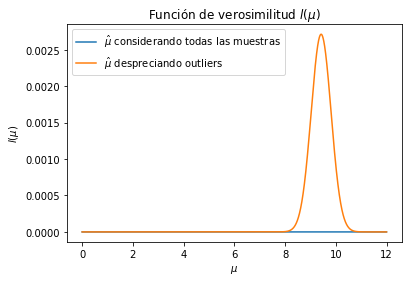

In [4]:
# Likelihood visualization
likelihood_full = []
likelihood_fixed = []
mu_samples = np.arange(0, 12, 0.001)
for mu_sample in mu_samples:
    likelihood_full.append(likelihood(y_full, np.full(y_full.shape, mu_sample), variances_full))
    likelihood_fixed.append(likelihood(y_fixed, np.full(y_fixed.shape, mu_sample), variances_fixed))
plt.figure()
plt.plot(mu_samples, likelihood_full, label=r'$\hat{\mu}$ considerando todas las muestras')
plt.plot(mu_samples, likelihood_fixed, label=r'$\hat{\mu}$ despreciando outliers')
plt.xlabel(r'$\mu$')
plt.ylabel(r'$l(\mu)$')
plt.legend()
plt.title(r'Función de verosimilitud $l(\mu)$')
plt.savefig('00-likelihood', bbox_inches='tight', dpi=300)
plt.show()

### P2. Regresión Lineal

In [5]:
# Data load
data = np.genfromtxt('szege_clima.csv',  delimiter=',', skip_header=1)
X = data[:,0]
y = data[:,1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

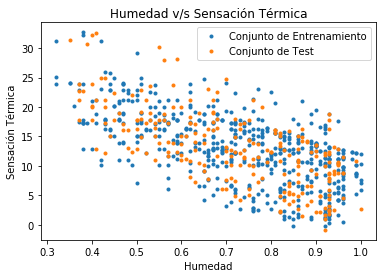

In [6]:
# Data visualization
plt.plot(X_train, y_train, linestyle='', marker='.', label='Conjunto de Entrenamiento')
plt.plot(X_test, y_test, linestyle='', marker='.', label='Conjunto de Test')
plt.xlabel('Humedad')
plt.ylabel('Sensación Térmica')
plt.legend()
plt.title('Humedad v/s Sensación Térmica')
plt.savefig('01-data_visualization', bbox_inches='tight', dpi=300)
plt.show()

In [7]:
# Linear regression
def reg_lineal(X, Y, rho):
    X_tilde = np.vstack([X, np.ones_like(X)]).T
    A = np.linalg.inv(np.dot(X_tilde.T, X_tilde) + rho * np.eye(X_tilde.shape[1])) 
    B = np.dot(X_tilde.T, Y)
    theta = np.dot(A, B)
    return theta

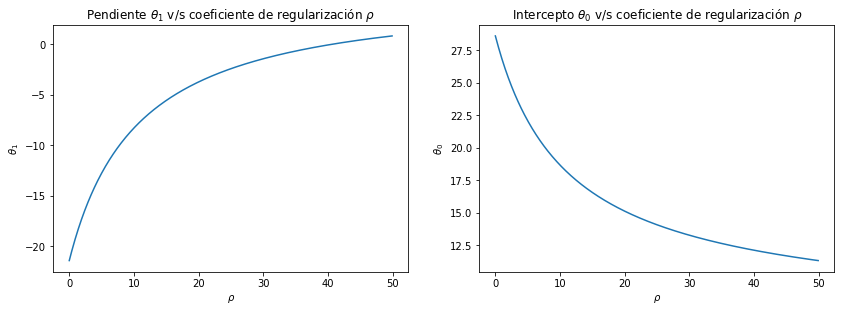

In [8]:
# Linear regression parameters
rhos = np.arange(0, 50, 0.1)
params = []
for rho in rhos:
    model_parameters = reg_lineal(X_train, y_train, rho)
    params.append(model_parameters)
params = np.array(params)
plt.figure(figsize=(14,10))
plt.subplot(2, 2, 1)
plt.plot(rhos, params[:,0])
plt.xlabel(r'$\rho$')
plt.ylabel(r'$\theta_1$')
plt.title(r'Pendiente $\theta_1$ v/s coeficiente de regularización $\rho$')
plt.subplot(2, 2, 2)
plt.plot(rhos, params[:,1])
plt.xlabel(r'$\rho$')
plt.ylabel(r'$\theta_0$')
plt.title(r'Intercepto $\theta_0$ v/s coeficiente de regularización $\rho$')
plt.savefig('02-regression_parameters', bbox_inches='tight', dpi=300)
plt.show()

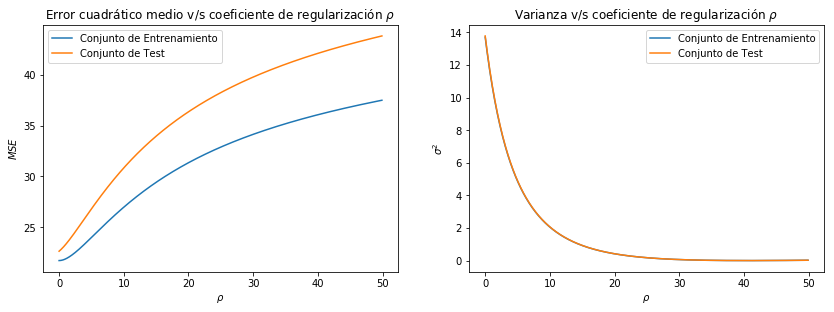

In [9]:
# Linear regression MSE and Variance
y_hat_train = params[:,0].reshape((params.shape[0], 1)) * X_train.reshape((1, X_train.shape[0])) + params[:,1].reshape((params.shape[0], 1))
y_hat_test = params[:,0].reshape((params.shape[0], 1)) * X_test.reshape((1, X_test.shape[0])) + params[:,1].reshape((params.shape[0], 1))
MSEs_train = ((y_train - y_hat_train) ** 2).mean(axis=1)
MSEs_test = ((y_test - y_hat_test) ** 2).mean(axis=1)
VARs_train = y_hat_train.var(axis=1)
VARs_test = y_hat_test.var(axis=1)
plt.figure(figsize=(14,10))
plt.subplot(2, 2, 1)
plt.plot(rhos, MSEs_train, label='Conjunto de Entrenamiento')
plt.plot(rhos, MSEs_test, label='Conjunto de Test')
plt.legend()
plt.title(r'Error cuadrático medio v/s coeficiente de regularización $\rho$')
plt.xlabel(r'$\rho$')
plt.ylabel(r'$MSE$')
plt.subplot(2, 2, 2)
plt.plot(rhos, VARs_train, label='Conjunto de Entrenamiento')
plt.plot(rhos, VARs_test, label='Conjunto de Test')
plt.legend()
plt.title(r'Varianza v/s coeficiente de regularización $\rho$')
plt.xlabel(r'$\rho$')
plt.ylabel(r'$\sigma^2$')
plt.savefig('03-mse_&_var', bbox_inches='tight', dpi=300)
plt.show()

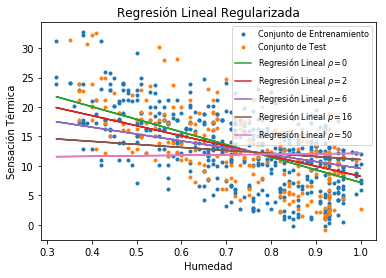

In [10]:
# Linear regression visualization
rho_samples = [0.0, 2.0, 6.0, 16.0, 50.0]
params_samples = []
y_hat_samples = []
for rho in rho_samples:
    model_params = reg_lineal(X_train, y_train, rho)
    params_samples.append(model_params)
    y_hat_samples.append(model_params[0] * X_train + model_params[1])

plt.plot(X_train, y_train, linestyle='', marker='.', label='Conjunto de Entrenamiento')
plt.plot(X_test, y_test, linestyle='', marker='.', label='Conjunto de Test')
for i in range(len(rho_samples)):
    plt.plot(X_train, y_hat_samples[i], label=r'Regresión Lineal $\rho={}$'.format(int(rho_samples[i])))
plt.xlabel('Humedad')
plt.ylabel('Sensación Térmica')
plt.title('Regresión Lineal Regularizada')
plt.legend(fontsize=8)
plt.savefig('04-linear_regression', bbox_inches='tight', dpi=300)
plt.show()